In [1]:
from genetic import GeneticAlgorithm

config_fast = {
    "MutationProb": 0.3,
    "K": 20,
    "NQueens": 8,
    "MAX_ITER": int(1e5),
    "pickMode": "wheel",
    "mutateMode": "shift-swap",
    "retention": 0.2,
    "seed": 4,
}

config_slow = {
    "MutationProb": 0.1,
    "K": 20,
    "NQueens": 8,
    "MAX_ITER": int(1e5),
    "pickMode": "wheel",
    "mutateMode": "shift",
    "retention": 0.0,
    "seed": 4,
}

In [2]:
fast = []

GAFast = GeneticAlgorithm(config=config_fast)
GAFast.initPool()
fast.append(GAFast.pool.getMinimumFitness())

while (
    GAFast.pool.getMinimumFitness() > 1
    and GAFast.generation < GAFast.config["MAX_ITER"]
):
    GAFast.updatePool(retention=GAFast.config["retention"])
    fast.append(GAFast.pool.getMinimumFitness())

In [3]:
slow = []

GASlow = GeneticAlgorithm(config=config_slow)
GASlow.initPool()
slow.append(GASlow.pool.getMinimumFitness())

while (
    GASlow.pool.getMinimumFitness() > 1
    and GASlow.generation < GASlow.config["MAX_ITER"]
):
    GASlow.updatePool(retention=GASlow.config["retention"])
    slow.append(GASlow.pool.getMinimumFitness())

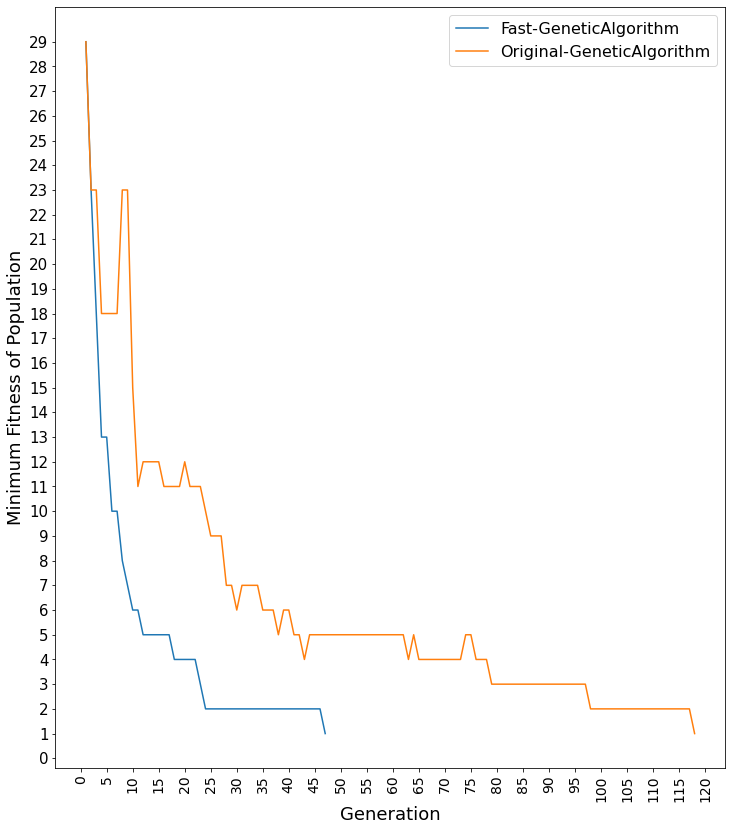

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))
plt.xticks(np.arange(0,len(slow)+100,5), rotation=90, size=14)
plt.yticks(np.arange(0, 30), size=15)
plt.ylabel("Minimum Fitness of Population", size=18)
plt.xlabel("Generation", size=18)
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'
sns.lineplot(x=np.arange(len(fast))+1, y=np.asarray(fast), label="Fast-GeneticAlgorithm")
sns.lineplot(x=np.arange(len(slow))+1, y=np.asarray(slow), label="Original-GeneticAlgorithm")
plt.legend(prop={'size': 16})
plt.savefig("NQueens.pdf", dpi=1200)